In [1]:
# download data from https://cellxgene.cziscience.com/collections/17481d16-ee44-49e5-bcf0-28c0780d8c4a
import os, sys
HOMEDIR = os.path.expanduser("~")
PROJDIR = rf"{HOMEDIR}/G-scIB_dev"
sys.path.append(rf"{PROJDIR}/src")

import Data_Handler as dh, Utils_Handler as uh, Vis_Handler as vh
import umap, numpy as np, pandas as pd, scanpy as sc
sc.settings.set_figure_params(dpi=80, facecolor="white")
sc.settings.verbosity = 3

In [2]:
adata = sc.read_h5ad(dh.DATA_EMB_["gut_fetal"])
obsm_keys = list(adata.obsm)
for embed in obsm_keys:
    print("%12s, %d" % (embed, adata.obsm[embed].shape[1]))
    assert adata.obsm[embed].shape[0] == np.unique(adata.obsm[embed], axis=0).shape[0]

     Harmony, 50
   Scanorama, 100
     X_bbknn, 2
       X_pca, 50
    X_scANVI, 30
      X_scVI, 30
      X_tsne, 2
      X_umap, 2
      scPoli, 10


In [3]:
sc.pp.highly_variable_genes(adata, subset=True, flavor="seurat_v3", n_top_genes=1000)

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)


In [4]:
adata

AnnData object with n_obs × n_vars = 62394 × 1000
    obs: 'CRL', 'Enrichment_fraction', 'PCW', 'Donor_nb', 'Purification', 'Sample', 'doublet_scores_observed_cells', 'n_genes', 'percent_mito', 'n_counts', 'cell_type_group', 'cell_name', 'cell_name_detailed', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'donor_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', '_scvi_batch', '_scvi_labels', 'conditions_combined'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'gene_symbols', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'highly_variable_rank', 'variances', 'variances_norm'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'cel

In [5]:
adata.write(rf"{dh.DATA_DIR}/gut_fetal/emb_hvg.h5ad", compression="gzip")

### Process Raw Data

In [2]:
adata = sc.read_h5ad(dh.DATA_RAW_["gut_fetal"])

In [3]:
adata

AnnData object with n_obs × n_vars = 62849 × 26328
    obs: 'CRL', 'Enrichment_fraction', 'PCW', 'Donor_nb', 'Purification', 'Sample', 'doublet_scores_observed_cells', 'n_genes', 'percent_mito', 'n_counts', 'cell_type_group', 'cell_name', 'cell_name_detailed', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'donor_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'gene_symbols', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    uns: 'cell_name_detailed_colors', 'cell_type_colors', 'default_embedding', 'schema_version', 'title'
    obsm: 'X_pca', 'X_umap'

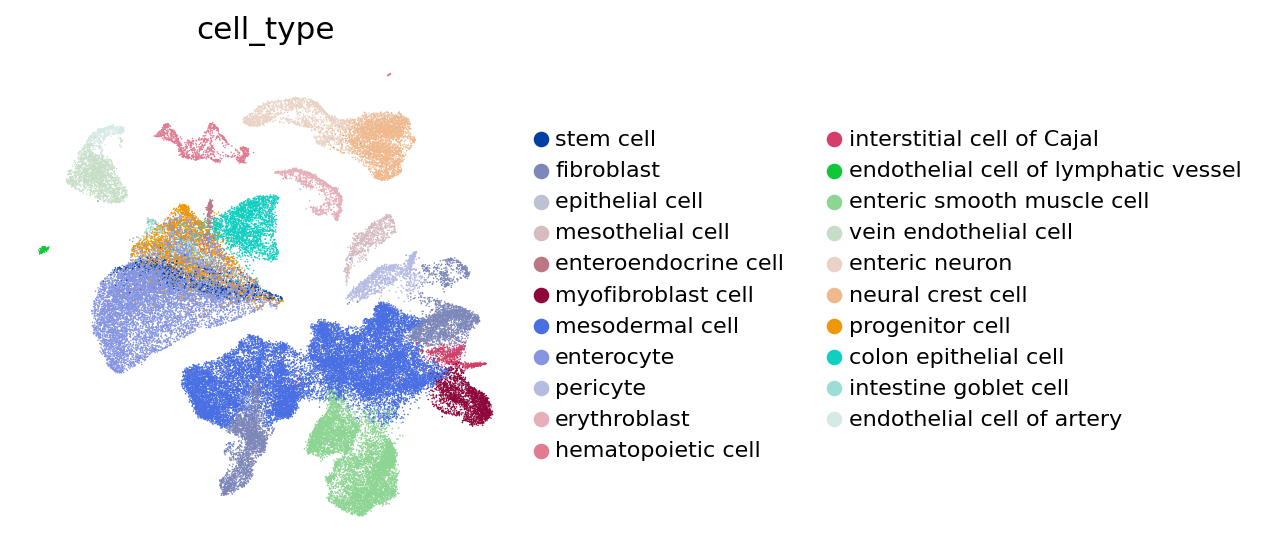

In [5]:
sc.pl.embedding(
    adata,
    basis="X_umap",
    color=["cell_type"],
    **vh.cfg
)

In [6]:
adata.raw

In [7]:
adata.X = adata.raw.X
del adata.raw
uh.preprocess(adata)

filtered out 455 cells that have less than 500 genes expressed
filtered out 1153 genes that are detected in less than 5 cells
25175 genes x 62394 cells after quality control.
normalizing by total count per cell
    finished (0:00:01): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


AnnData object with n_obs × n_vars = 62394 × 25175
    obs: 'CRL', 'Enrichment_fraction', 'PCW', 'Donor_nb', 'Purification', 'Sample', 'doublet_scores_observed_cells', 'n_genes', 'percent_mito', 'n_counts', 'cell_type_group', 'cell_name', 'cell_name_detailed', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'donor_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'gene_symbols', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    uns: 'cell_name_detailed_colors', 'default_embedding', 'schema_version', 'title', 'log1p'
    obsm: 'X_pca', 'X_umap'

In [8]:
adata.obs["Sample"].unique()

['4918STDY7321513', '4918STDY7321514', '4918STDY7321515', '4918STDY7317585', '4918STDY7317586', ..., '4918STDY7718973', '4918STDY7718974', '4918STDY7718975', '4918STDY7718976', '4918STDY7718977']
Length: 34
Categories (34, object): ['4918STDY7317585', '4918STDY7317586', '4918STDY7317587', '4918STDY7321513', ..., '4918STDY7718974', '4918STDY7718975', '4918STDY7718976', '4918STDY7718977']

In [9]:
adata.obs["donor_id"].unique()

['LVG1', 'LGS1', 'LGS2', 'LGS3']
Categories (4, object): ['LGS1', 'LGS2', 'LGS3', 'LVG1']

In [9]:
adata

AnnData object with n_obs × n_vars = 62394 × 25175
    obs: 'CRL', 'Enrichment_fraction', 'PCW', 'Donor_nb', 'Purification', 'Sample', 'doublet_scores_observed_cells', 'n_genes', 'percent_mito', 'n_counts', 'cell_type_group', 'cell_name', 'cell_name_detailed', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'donor_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'gene_symbols', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    uns: 'cell_name_detailed_colors', 'default_embedding', 'schema_version', 'title', 'log1p'
    obsm: 'X_pca', 'X_umap'

In [10]:
adata.write(rf"{dh.DATA_DIR}/FetalGut/emb.h5ad", compression="gzip")

### Save Metadata

In [2]:
adata = sc.read_h5ad(dh.DATA_EMB_["gut_fetal"])

In [3]:
adata

AnnData object with n_obs × n_vars = 62394 × 25175
    obs: 'CRL', 'Enrichment_fraction', 'PCW', 'Donor_nb', 'Purification', 'Sample', 'doublet_scores_observed_cells', 'n_genes', 'percent_mito', 'n_counts', 'cell_type_group', 'cell_name', 'cell_name_detailed', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'donor_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'gene_symbols', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    uns: 'cell_name_detailed_colors', 'default_embedding', 'log1p', 'schema_version', 'title'
    obsm: 'X_pca', 'X_umap'

In [4]:
adata.obs["Sample"].unique()

['4918STDY7321513', '4918STDY7321514', '4918STDY7321515', '4918STDY7317585', '4918STDY7317586', ..., '4918STDY7718973', '4918STDY7718974', '4918STDY7718975', '4918STDY7718976', '4918STDY7718977']
Length: 34
Categories (34, object): ['4918STDY7317585', '4918STDY7317586', '4918STDY7317587', '4918STDY7321513', ..., '4918STDY7718974', '4918STDY7718975', '4918STDY7718976', '4918STDY7718977']

In [5]:
adata.obs["donor_id"].unique()

['2029', '2026', '2043', '2046', '2049', '2121', '2119', '2133', '2134']
Categories (9, object): ['2026', '2029', '2043', '2046', ..., '2119', '2121', '2133', '2134']

In [7]:
os.makedirs(rf"{dh.META_DIR}/gut_fetal/", exist_ok=True)

In [8]:
import json
CELL2CAT = dict()
for idx, batch in enumerate(adata.obs["cell_type"].unique()):
    CELL2CAT[batch] = idx
_file = open(rf"{dh.META_DIR}/gut_fetal/cell2cat.json", "w")
_file.write(json.dumps(CELL2CAT))
_file.close()

BATCH2CAT = dict()
for idx, batch in enumerate(adata.obs["donor_id"].unique()):
    BATCH2CAT[batch] = idx
_file = open(rf"{dh.META_DIR}/gut_fetal/batch2cat.json", "w")
_file.write(json.dumps(BATCH2CAT))
_file.close()